The COVID-19 pandemic has impacted the world in unprecedented ways. Understanding the trends and patterns in the spread of the virus can help us make informed decisions to mitigate its effects. This project aims to analyze the COVID-19 data from Our World in Data, focusing on global trends, key statistics, and correlations between various metrics.



**Data Collection**

The dataset used in this project is sourced from Our World in Data. It contains comprehensive data on COVID-19 cases, deaths, testing, and other related metrics for countries worldwide. Two continents were considered, Africa and Europe. The data was downloaded and saved to a csv file. The libraries used include; Pandas, Numpy, Matplotlib, Seaborn, Datetime


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from datetime import datetime

In [9]:
# Load the dataset
df=pd.read_csv("covid_data.csv")

In [10]:
# Display the data to view the rows and columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19116 entries, 0 to 19115
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    19116 non-null  object 
 1   continent                                   19116 non-null  object 
 2   location                                    19116 non-null  object 
 3   date                                        19116 non-null  object 
 4   total_cases                                 19116 non-null  float64
 5   new_cases                                   19116 non-null  float64
 6   new_cases_smoothed                          19116 non-null  float64
 7   total_deaths                                19116 non-null  float64
 8   new_deaths                                  19116 non-null  float64
 9   new_deaths_smoothed                         19116 non-null  float64
 10  total_case

In [11]:
# Display the first few rows of the dataframe to understand its structure
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AGO,Africa,Angola,20/03/2020,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,26.664,0.0,61.15,0.581,35588996,0.0,0.0,0.0,0.0
1,AGO,Africa,Angola,21/03/2020,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,26.664,0.0,61.15,0.581,35588996,0.0,0.0,0.0,0.0
2,AGO,Africa,Angola,22/03/2020,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,26.664,0.0,61.15,0.581,35588996,0.0,0.0,0.0,0.0
3,AGO,Africa,Angola,23/03/2020,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,26.664,0.0,61.15,0.581,35588996,0.0,0.0,0.0,0.0
4,AGO,Africa,Angola,24/03/2020,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,26.664,0.0,61.15,0.581,35588996,0.0,0.0,0.0,0.0


Data Cleaning

To ensure the analysis is accurate, we need to clean the data by handling missing values and dropping unnecessary columns.

In [ ]:
# # Check for missing values in the dataset
# missing_values = df.isnull().sum()
# print(missing_values)

# # Drop columns with a high number of missing values
# columns_to_drop = ['tests_units', 'excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute',
#                    'excess_mortality_cumulative_per_million', 'excess_mortality_daily', 'excess_mortality_week',
#                    'excess_mortality_month', 'excess_mortality_per_million', 'weekly_icu_admissions',
#                    'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million']
# df = df.drop(columns=columns_to_drop)

# # Fill remaining missing values with 0
# df = df.fillna(0)


In [12]:
# Display some descriptive statistics
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.911600e+04,19116.000000,19116.000000,19116.000000,19116.000000,19116.000000,19116.000000,19116.000000,19116.000000,19116.000000,...,19116.000000,19116.000000,19116.000000,19116.000000,19116.000000,1.911600e+04,1.911600e+04,19116.000000,19116.000000,19116.000000
mean,2.800220e+06,9153.403379,9096.279356,38919.737916,75.112524,74.933202,59347.026788,198.060339,197.019850,716.294186,...,26.524241,18.141848,2.820598,73.155144,0.752021,6.066159e+07,5.601692e+03,0.655775,0.824385,102.409651
std,5.927414e+06,28772.759704,25549.845376,65110.560236,172.249345,164.559438,108822.634301,648.346469,491.207973,899.822964,...,15.562492,24.514459,2.463581,9.152067,0.170205,5.261645e+07,4.033983e+04,3.035910,5.738970,499.194931
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,54.690000,0.485000,5.540745e+06,-1.777920e+04,-10.150000,-20.600000,-213.256976
25%,6.083350e+04,27.000000,84.143000,1117.000000,0.000000,1.143000,1395.815750,0.702000,2.001000,26.872750,...,20.400000,0.000000,0.900000,66.600000,0.581000,1.756402e+07,0.000000e+00,0.000000,0.000000,0.000000
50%,2.552830e+05,462.000000,688.500000,6174.000000,7.000000,9.571000,5118.040500,9.523000,17.034000,177.232000,...,27.800000,0.000000,2.540000,72.580000,0.824000,5.402748e+07,0.000000e+00,0.000000,0.000000,0.000000
75%,2.886979e+06,4914.250000,6241.536000,47877.250000,59.000000,62.714000,65077.723000,128.136750,174.470000,1279.351500,...,33.200000,36.791000,4.210000,82.240000,0.931000,8.336984e+07,0.000000e+00,0.000000,0.000000,0.000000
max,3.563537e+07,527487.000000,366554.714000,379829.000000,1623.000000,1391.286000,525494.713000,35400.095000,7135.098000,3196.927000,...,58.300000,89.827000,8.050000,83.560000,0.947000,2.185412e+08,1.240683e+06,30.850000,170.700000,8573.387499


In [13]:
# Display the columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [14]:
df.size

1280772

In [15]:
df.index

RangeIndex(start=0, stop=19116, step=1)

In [16]:
# Display the number of rows and columns in the data
df.shape

(19116, 67)

In [17]:
# Display the data types present in the data
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [18]:
column_list=["continent", "location", "date", "total_cases", "new_cases",
"total_deaths", "new_deaths", "icu_patients", "hosp_patients","total_vaccinations",
"new_vaccinations","median_age", "aged_65_older", "population"]

In [28]:
# write the data into a datframe
df=pd.read_csv("covid_data.csv", usecols=column_list)

In [20]:
# print out the dataframe
df

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_vaccinations,new_vaccinations,median_age,aged_65_older,population
0,Africa,Angola,20/03/2020,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.8,2.405,35588996
1,Africa,Angola,21/03/2020,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.8,2.405,35588996
2,Africa,Angola,22/03/2020,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.8,2.405,35588996
3,Africa,Angola,23/03/2020,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.8,2.405,35588996
4,Africa,Angola,24/03/2020,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.8,2.405,35588996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19111,Europe,United Kingdom,30/09/2022,23672856.0,0.0,208247.0,63.0,0.0,9323.0,0.0,0.0,40.8,18.517,67508936
19112,Europe,United Kingdom,01/10/2022,23672856.0,0.0,208324.0,77.0,0.0,9761.0,0.0,0.0,40.8,18.517,67508936
19113,Europe,United Kingdom,02/10/2022,23672856.0,0.0,208385.0,61.0,0.0,10112.0,0.0,0.0,40.8,18.517,67508936
19114,Europe,United Kingdom,03/10/2022,23672856.0,0.0,208464.0,79.0,0.0,10632.0,0.0,0.0,40.8,18.517,67508936


In [21]:
df.dtypes

continent              object
location               object
date                   object
total_cases           float64
new_cases             float64
total_deaths          float64
new_deaths            float64
icu_patients          float64
hosp_patients         float64
total_vaccinations    float64
new_vaccinations      float64
median_age            float64
aged_65_older         float64
population              int64
dtype: object

In [22]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_vaccinations,new_vaccinations,median_age,aged_65_older,population
count,1.911600e+04,19116.000000,19116.000000,19116.000000,19116.000000,19116.000000,1.911600e+04,1.911600e+04,19116.000000,19116.000000,1.911600e+04
mean,2.800220e+06,9153.403379,38919.737916,75.112524,425.952082,2646.470548,1.865718e+07,5.029166e+04,32.390364,11.618584,6.066159e+07
std,5.927414e+06,28772.759704,65110.560236,172.249345,936.922541,6108.861038,4.234240e+07,1.527498e+05,11.703141,8.249455,5.261645e+07
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,16.800000,2.405000,5.540745e+06
25%,6.083350e+04,27.000000,1117.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,20.000000,2.974000,1.756402e+07
50%,2.552830e+05,462.000000,6174.000000,7.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,39.600000,14.178000,5.402748e+07
75%,2.886979e+06,4914.250000,47877.250000,59.000000,364.000000,1629.250000,9.794895e+06,8.773500e+03,43.200000,19.718000,8.336984e+07
max,3.563537e+07,527487.000000,379829.000000,1623.000000,7019.000000,39258.000000,1.859147e+08,2.389472e+06,47.900000,23.021000,2.185412e+08


In [23]:
df_new_cases=pd.DataFrame(df.groupby(["date", "location"])
                  ["new_cases"].sum()).reset_index()

In [24]:
df_new_cases

,date,location,new_cases
0,01/01/2021,Angola,15.0
1,01/01/2021,Belgium,1793.0
2,01/01/2021,Egypt,1409.0
3,01/01/2021,Ethiopia,388.0
4,01/01/2021,Finland,254.0
...,...,...,...
19111,31/12/2021,Rwanda,1228.0
19112,31/12/2021,South Africa,11754.0
19113,31/12/2021,Spain,0.0
19114,31/12/2021,United Kingdom,189836.0


In [25]:
df_total_deaths=pd.DataFrame(df.groupby(["date", "location"])
                  ["total_deaths"].sum()).reset_index()

In [26]:
df_total_deaths

,date,location,total_deaths
0,01/01/2021,Angola,405.0
1,01/01/2021,Belgium,19581.0
2,01/01/2021,Egypt,7687.0
3,01/01/2021,Ethiopia,1937.0
4,01/01/2021,Finland,598.0
...,...,...,...
19111,31/12/2021,Rwanda,1350.0
19112,31/12/2021,South Africa,91145.0
19113,31/12/2021,Spain,89405.0
19114,31/12/2021,United Kingdom,177355.0


In [34]:
def country_death(value):
    df=pd.read_csv("covid_data.csv")
    dftest = df.groupby("location").sum()
    x = dftest.loc[value,"new_cases"]
    y = dftest.loc[value,"new_deaths"]
    percentage = (y/x) * 100
    return percentage

In [35]:
finder = country_death('Italy')

In [36]:
finder

0.7843564753474187

In [37]:
def country_recovery(value):
    df=pd.read_csv("covid_data.csv")
    dftest = df.groupby("location").sum()
    x = dftest.loc[value,"new_cases"]
    y = dftest.loc[value,"new_deaths"]
    percentage = ((x-y)/x) * 100
    return percentage

In [38]:
finder2 = country_recovery("Italy")

In [39]:
finder2

99.21564352465259

In [40]:
def country_infection(value):
    df=pd.read_csv("covid_data.csv")
    dftest = df.groupby("location").sum()
    x = dftest.loc[value,"new_cases"]
    y = df.groupby("location")["population"].mean()
    percentage = (x/y) * 100
    return percentage

In [41]:
finder3 = country_infection("Italy")

In [ ]:
finder3

location
Angola             63.511171
Belgium           193.918474
Egypt              20.364869
Ethiopia           18.319826
Finland           407.941315
France             33.331349
Germany            27.111709
Ghana              67.520241
Greece            217.650929
Italy              38.285833
Kenya              41.836092
Madagascar         76.331228
Netherlands       128.689150
Nigeria            10.342666
Russia             15.619149
Rwanda            164.066756
South Africa       37.738391
Spain              47.526573
United Kingdom     33.481476
Zimbabwe          138.494127
Name: population, dtype: float64

In [42]:
df.max()

continent                  Europe
location                 Zimbabwe
date                   31/12/2021
total_cases            35635373.0
new_cases                527487.0
total_deaths             379829.0
new_deaths                 1623.0
icu_patients               7019.0
hosp_patients             39258.0
total_vaccinations    185914689.0
new_vaccinations        2389472.0
median_age                   47.9
aged_65_older              23.021
population              218541216
dtype: object

In [43]:
#doing a value count to see continents
print(df["continent"].value_counts())

continent
Europe    9736
Africa    9380
Name: count, dtype: int64


In [44]:
df["continent"]

0        Africa
1        Africa
2        Africa
3        Africa
4        Africa
          ...  
19111    Europe
19112    Europe
19113    Europe
19114    Europe
19115    Europe
Name: continent, Length: 19116, dtype: object

In [45]:
#df_continent=df.groupby(df["continent"])

In [46]:
df_continent=df.groupby(df["continent"]).agg({"total_deaths":"sum"})
df_continent=df_continent.reset_index()

In [47]:
df_continent

,continent,total_deaths
0,Africa,82859378.0
1,Europe,661130332.0


In [48]:
# for continent, df_continent in df
#     print(continent)
#     print(df_continent)

In [ ]:
#there are two continents in the data, and our analysis will be focused on continents

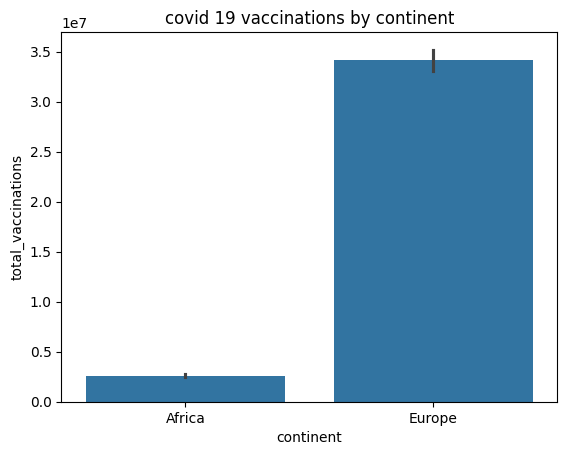

In [49]:
sns.barplot(x="continent", y="total_vaccinations", data=df)
plt.title("covid 19 vaccinations by continent")
plt.show()

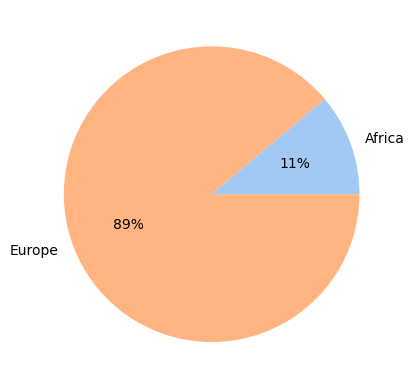

In [50]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df_continent['total_deaths'], labels =df_continent['continent'] , colors = colors, autopct='%.0f%%')
plt.show()

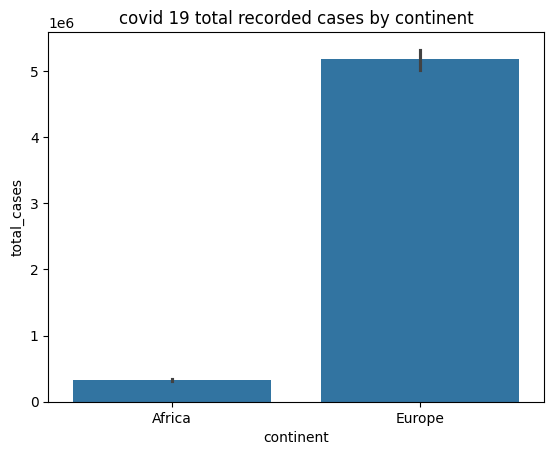

In [51]:
#going further to check total cases and recovery
sns.barplot(x="continent", y="total_cases", data=df)
plt.title("covid 19 total recorded cases by continent")
plt.show()

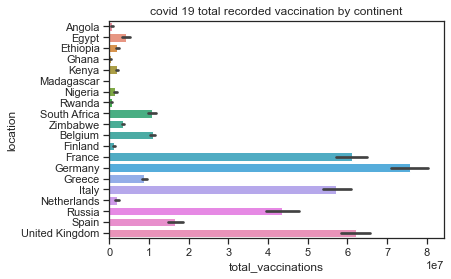

In [ ]:
#checking for vacination history
sns.barplot(x="total_vaccinations", y="location", data=df)
plt.title("covid 19 total recorded vaccination by location")
plt.show()

In [ ]:
#it is shown that theres a direct relationship between vaccination, case count and total deaths

In [ ]:
#why are people dying more in europe? is it a matter of age

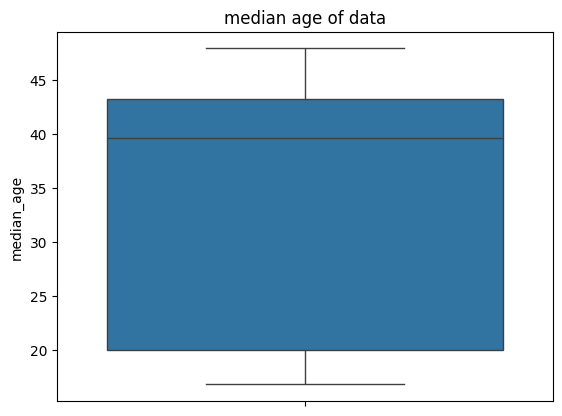

In [52]:
sns.boxplot(df["median_age"])
plt.title("median age of data")
plt.show()

In [53]:
# #define Seaborn color palette to use
# colors = sns.color_palette("pastel")[0:5]

# #create pie chart
# plt.pie(df["total_cases"], labels = df["location"], colors = colors, autopct='%.0f%%')
# plt.show()

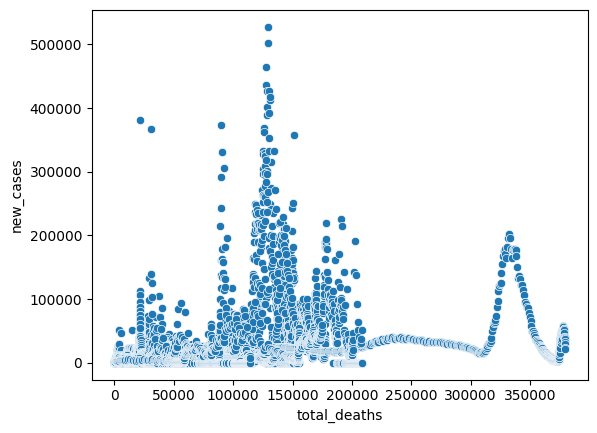

In [54]:
# Drawing Seaborn Scatter Plot to find relationship between age and death
sns.scatterplot(x = "total_deaths", y = "new_cases", data = df)
plt.show()

<Axes: xlabel='location'>

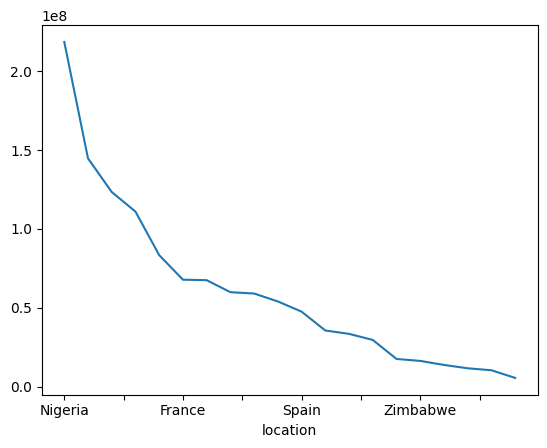

In [55]:
df.groupby("location")["population"].mean().sort_values(ascending=False).head(20).plot(kind="line")
#plt.xticks(rotation=90)

In [56]:
df.groupby("location")["population"].mean()

location
Angola             35588996.0
Belgium            11655923.0
Egypt             110990096.0
Ethiopia          123379928.0
Finland             5540745.0
France             67813000.0
Germany            83369840.0
Ghana              33475870.0
Greece             10384972.0
Italy              59037472.0
Kenya              54027484.0
Madagascar         29611718.0
Netherlands        17564020.0
Nigeria           218541216.0
Russia            144713312.0
Rwanda             13776702.0
South Africa       59893884.0
Spain              47558632.0
United Kingdom     67508936.0
Zimbabwe           16320539.0
Name: population, dtype: float64

In [59]:
# current_date = datetime.today().strftime("%d/%m/%Y")
# file_name = "cases_per_country.csv"
# dff = df[df["date"].eq(current_date)].sort_values(by="new_cases"
#                                                         '', ascending=False)
# df.to_csv(file_name, encoding="utf-8", index=False)


Insights

Global Trends: The plots reveal significant peaks in total cases and deaths over time, highlighting the waves of the pandemic.
Daily Dynamics: The new cases and deaths plots show the daily fluctuation and spread of the virus.
Correlation Analysis: The scatter plot indicates a correlation between new cases and total deaths, suggesting that higher new cases often lead to increased deaths.
Regional Analysis: The bar plot of total cases by location shows which countries have been most affected, providing insights into regional impacts.


Conclusion
The analysis of the COVID-19 dataset reveals critical trends and patterns in the spread of the virus globally. By understanding these trends, we can better prepare for and respond to future waves of the pandemic. Continuous monitoring and analysis are essential for effective decision-making and public health strategies.